In [21]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('job_descriptions.csv')

# Display the first 5 rows of the DataFrame to confirm it loaded correctly
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [2]:
print(df.columns)

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')


In [3]:
# Print the unique job titles
unique_titles = df['Job Title'].unique()
print(unique_titles)

['Digital Marketing Specialist' 'Web Developer' 'Operations Manager'
 'Network Engineer' 'Event Manager' 'Software Tester' 'Teacher'
 'UX/UI Designer' 'Wedding Planner' 'QA Analyst' 'Litigation Attorney'
 'Mechanical Engineer' 'Network Administrator' 'Account Manager'
 'Brand Manager' 'Social Worker' 'Social Media Coordinator'
 'Email Marketing Specialist' 'HR Generalist' 'Legal Assistant'
 'Nurse Practitioner' 'Account Director' 'Software Engineer'
 'Purchasing Agent' 'Sales Consultant' 'Civil Engineer'
 'Network Security Specialist' 'UI Developer' 'Financial Planner'
 'Event Planner' 'Psychologist' 'Electrical Designer' 'Data Analyst'
 'Technical Writer' 'Tax Consultant' 'Account Executive'
 'Systems Administrator' 'Database Administrator' 'Research Analyst'
 'Data Entry Clerk' 'Registered Nurse' 'Investment Analyst'
 'Speech Therapist' 'Sales Manager' 'Landscape Architect'
 'Key Account Manager' 'UX Researcher' 'Investment Banker'
 'IT Support Specialist' 'Art Director' 'Software De

In [4]:
# Show the count for each job title
title_counts = df['Job Title'].value_counts()
print("Job Title Frequency:")
print(title_counts)

Job Title Frequency:
Job Title
UX/UI Designer                  48551
Digital Marketing Specialist    27975
Software Engineer               27630
Network Engineer                24393
Software Tester                 20945
                                ...  
Personal Assistant               3441
QA Engineer                      3439
Procurement Coordinator          3424
Key Account Manager              3411
Inventory Analyst                3342
Name: count, Length: 147, dtype: int64


In [5]:
# pip install transformers pandas torch scipy

In [6]:
# Check for total number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of exact duplicate rows: {num_duplicates}")

Number of exact duplicate rows: 0


In [22]:
# Columns to keep for IT classification and skills analysis
keep_columns = [
    "Job Title", 
    "Role", 
    "Job Description", 
    "skills", 
    "Responsibilities", 
    "Job Posting Date",  
    "Work Type"
]

# Drop all other columns
df = df[keep_columns]

print("Remaining columns:")
print(df.columns)


Remaining columns:
Index(['Job Title', 'Role', 'Job Description', 'skills', 'Responsibilities',
       'Job Posting Date', 'Work Type'],
      dtype='object')


In [23]:
# Define IT jobs explicitly
it_jobs = [
    'Web Developer','Network Engineer','Software Tester','UX/UI Designer',
    'QA Analyst','Network Administrator','Software Engineer',
    'Network Security Specialist','UI Developer','Data Analyst',
    'Technical Writer','Systems Administrator','Database Administrator',
    'IT Support Specialist','Software Developer','Data Engineer',
    'Database Developer','Systems Analyst','Java Developer',
    'Front-End Engineer','Back-End Developer','Software Architect',
    'IT Manager','Quality Assurance Analyst','Front-End Developer',
    'Data Scientist','QA Engineer','Network Analyst','Web Designer',
    'IT Administrator','Business Analyst','UX Researcher'
]

# Add new column 'IT' 
df["IT"] = df["Job Title"].apply(lambda x: 1 if x in it_jobs else 0)

print(df.head())

                      Job Title                       Role  \
0  Digital Marketing Specialist       Social Media Manager   
1                 Web Developer     Frontend Web Developer   
2            Operations Manager    Quality Control Manager   
3              Network Engineer  Wireless Network Engineer   
4                 Event Manager         Conference Manager   

                                     Job Description  \
0  Social Media Managers oversee an organizations...   
1  Frontend Web Developers design and implement u...   
2  Quality Control Managers establish and enforce...   
3  Wireless Network Engineers design, implement, ...   
4  A Conference Manager coordinates and manages c...   

                                              skills  \
0  Social media platforms (e.g., Facebook, Twitte...   
1  HTML, CSS, JavaScript Frontend frameworks (e.g...   
2  Quality control processes and methodologies St...   
3  Wireless network design and architecture Wi-Fi...   
4  Event p

In [9]:
# pip install tf-keras

In [24]:
# Keep only IT jobs
df_it = df[df["IT"] == 1].copy()

print("Remaining rows:", len(df_it))
print(df_it.head())

Remaining rows: 386493
          Job Title                       Role  \
1     Web Developer     Frontend Web Developer   
3  Network Engineer  Wireless Network Engineer   
5   Software Tester  Quality Assurance Analyst   
7    UX/UI Designer    User Interface Designer   
8    UX/UI Designer       Interaction Designer   

                                     Job Description  \
1  Frontend Web Developers design and implement u...   
3  Wireless Network Engineers design, implement, ...   
5  A Quality Assurance Analyst tests software and...   
7  User Interface Designers focus on the visual a...   
8  Interaction Designers specialize in designing ...   

                                              skills  \
1  HTML, CSS, JavaScript Frontend frameworks (e.g...   
3  Wireless network design and architecture Wi-Fi...   
5  Quality assurance processes Testing methodolog...   
7  UI design principles and best practices Graphi...   
8  Interaction design principles User behavior an...   

  

In [25]:
df_it.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386493 entries, 1 to 1615936
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Job Title         386493 non-null  object
 1   Role              386493 non-null  object
 2   Job Description   386493 non-null  object
 3   skills            386493 non-null  object
 4   Responsibilities  386493 non-null  object
 5   Job Posting Date  386493 non-null  object
 6   Work Type         386493 non-null  object
 7   IT                386493 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 26.5+ MB


In [26]:
# Reset index after filtering
df_it = df_it.reset_index(drop=True)

print(df_it.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386493 entries, 0 to 386492
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Job Title         386493 non-null  object
 1   Role              386493 non-null  object
 2   Job Description   386493 non-null  object
 3   skills            386493 non-null  object
 4   Responsibilities  386493 non-null  object
 5   Job Posting Date  386493 non-null  object
 6   Work Type         386493 non-null  object
 7   IT                386493 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 23.6+ MB
None


In [27]:
df_it['Job Posting Date'] = pd.to_datetime(df_it['Job Posting Date'], errors='coerce')
df_it['Year'] = df_it['Job Posting Date'].dt.year

In [28]:
df_it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386493 entries, 0 to 386492
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Job Title         386493 non-null  object        
 1   Role              386493 non-null  object        
 2   Job Description   386493 non-null  object        
 3   skills            386493 non-null  object        
 4   Responsibilities  386493 non-null  object        
 5   Job Posting Date  386493 non-null  datetime64[ns]
 6   Work Type         386493 non-null  object        
 7   IT                386493 non-null  int64         
 8   Year              386493 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(6)
memory usage: 25.1+ MB


In [29]:
df_it.head(7)

,Job Title,Role,Job Description,skills,Responsibilities,Job Posting Date,Work Type,IT,Year
0,Web Developer,Frontend Web Developer,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",2022-12-19,Intern,1,2022
1,Network Engineer,Wireless Network Engineer,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",2023-02-25,Full-Time,1,2023
2,Software Tester,Quality Assurance Analyst,A Quality Assurance Analyst tests software and...,Quality assurance processes Testing methodolog...,Test software applications and systems to iden...,2023-07-25,Full-Time,1,2023
3,UX/UI Designer,User Interface Designer,User Interface Designers focus on the visual a...,UI design principles and best practices Graphi...,Create visually appealing user interfaces (UI)...,2022-09-20,Contract,1,2022
4,UX/UI Designer,Interaction Designer,Interaction Designers specialize in designing ...,Interaction design principles User behavior an...,"Work on interaction design, defining how users...",2022-02-19,Temporary,1,2022
5,QA Analyst,Performance Testing Specialist,Performance Testing Specialists assess the per...,Performance testing Load testing Stress testin...,Focus on performance and load testing to asses...,2023-07-01,Contract,1,2023
6,Network Administrator,Network Security Analyst,Protect an organizations computer networks and...,Network security protocols Intrusion detection...,"Manage and secure computer networks, including...",2022-05-24,Temporary,1,2022


In [30]:
# Count of jobs per year
print("Count of jobs per year:")
print(df_it['Year'].value_counts().sort_index())
print("\n" + "="*50 + "\n")

Count of jobs per year:
Year
2021     56865
2022    193538
2023    136090
Name: count, dtype: int64




In [16]:
# Distribution of work type
print("Distribution of work type:")
print(df_it['Work Type'].value_counts())
print("\n" + "="*50 + "\n")

Distribution of work type:
Work Type
Part-Time    77598
Temporary    77519
Contract     77450
Intern       76994
Full-Time    76932
Name: count, dtype: int64




In [17]:
# Top 10 job titles
print("Top 10 job titles:")
print(df_it['Job Title'].value_counts().head(10))
print("\n" + "="*50 + "\n")

Top 10 job titles:
Job Title
UX/UI Designer           48551
Software Engineer        27630
Network Engineer         24393
Software Tester          20945
Network Administrator    17581
Data Analyst             17402
Systems Administrator    17281
UI Developer             13926
Java Developer           10589
UX Researcher            10539
Name: count, dtype: int64




In [18]:
# Top 10 roles
print("Top 10 roles:")
print(df_it['Role'].value_counts().head(10))

Top 10 roles:
Role
Interaction Designer         20580
Network Administrator        17470
User Interface Designer      14036
User Experience Designer     13935
Quality Assurance Analyst    10541
Database Administrator       10482
Backend Developer            10404
Frontend Developer           10308
UX/UI Designer                7028
Network Security Analyst      7027
Name: count, dtype: int64


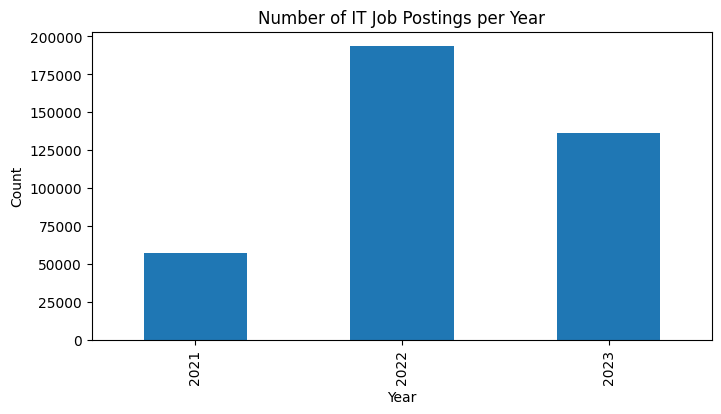

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Jobs per year
df_it['Year'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title("Number of IT Job Postings per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

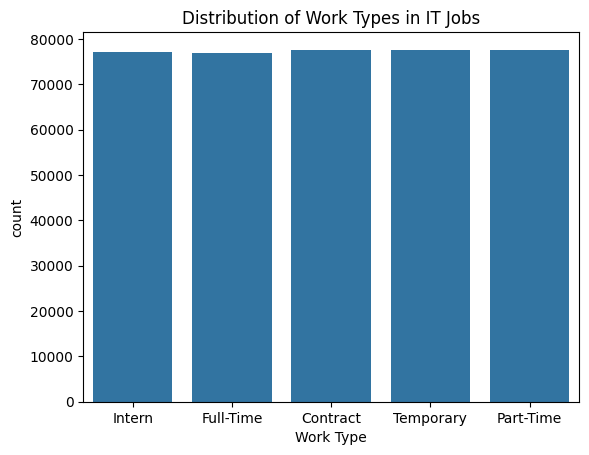

In [20]:
# Work type distribution
sns.countplot(data=df_it, x='Work Type')
plt.title("Distribution of Work Types in IT Jobs")
plt.show()

In [31]:
from collections import Counter

# Split skills into lists
df_it['skills_list'] = df_it['skills'].str.split(',')

# Explode into individual rows
skills_exploded = df_it['skills_list'].explode().str.strip()

# Count skills
skill_counts = Counter(skills_exploded)

# Top 20 skills
print(skill_counts.most_common(20))

[('Python', 27714), ('CSS', 24281), ('Java', 20879), ('Interaction design principles User behavior and psychology Wireframing and prototyping tools Animation and micro-interaction design Collaborative design processes', 20580), ('AWS', 17501), ('Network management Troubleshooting Network security IT certifications (e.g.', 17470), ('CCNA)', 17470), ('UI design principles and best practices Graphic design tools (e.g.', 14036), ('Adobe Photoshop', 14036), ('Illustrator) Typography and color theory Visual design and layout Responsive design', 14036), ('User-centered design principles UX/UI design tools (e.g.', 13935), ('Sketch', 13935), ('Adobe XD) Wireframing and prototyping Usability testing and user research Information architecture and user flows', 13935), ('Node.js', 13856), ('Quality assurance processes Testing methodologies (e.g.', 10541), ('manual', 10541), ('automated) Bug tracking and reporting Test case development Regression testing', 10541), ('Hadoop', 10501), ('Database manag

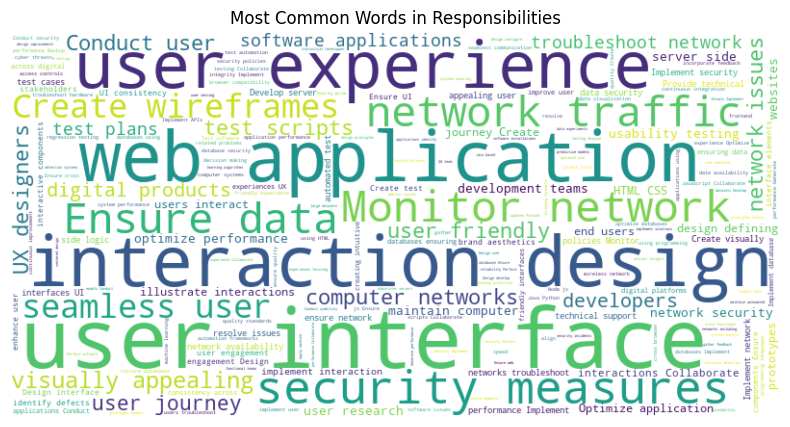

In [24]:
from wordcloud import WordCloud

text = " ".join(df_it['Responsibilities'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Responsibilities")
plt.show()


In [ ]:
# pip install wordcloud

In [37]:
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from tqdm import tqdm

# Load spaCy model with only tagger + lemmatizer (disable ner & parser)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# Define stopwords
stop_words = set(stopwords.words("english"))

# Cleaning before NLP (regex + stopwords)
def basic_clean(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9+.\s,]", " ", text)  # keep alphanum, +, .
    tokens = re.split(r"[,\s]+", text)
    return " ".join([tok for tok in tokens if tok and tok not in stop_words])

# Apply basic cleaning first
df_it["skills_clean_stage1"] = df_it["skills"].apply(basic_clean)

# Use spaCy in batch mode with progress bar
cleaned_texts = []
for doc in tqdm(nlp.pipe(df_it["skills_clean_stage1"], batch_size=500), total=len(df_it)):
    lemmas = [token.lemma_ for token in doc if token.text.strip()]
    cleaned_texts.append(" ".join(lemmas))

df_it["clean_skills"] = cleaned_texts


100%|█████████████████████████████████████████████████████████████████████████| 386493/386493 [35:36<00:00, 180.89it/s]


In [40]:
# Step 1: Feature Extraction (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform skills column
X = vectorizer.fit_transform(df_it["clean_skills"])

# Get number of unique features
num_features = len(vectorizer.get_feature_names_out())
print("Number of unique features:", num_features)

# Preview first 20 features
print(vectorizer.get_feature_names_out()[:20])

Number of unique features: 382
['access' 'accessibility' 'accessible' 'accuracy' 'active'
 'administration' 'adobe' 'ajax' 'alert' 'algorithm' 'alignment'
 'analysis' 'analytical' 'angular' 'animation' 'ansible' 'api' 'apis'
 'app' 'appium']


In [41]:
# Convert to DataFrame for better visualization
skills_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Preview first few rows
print(skills_tfidf.head())


   access  accessibility  accessible  accuracy  active  administration  \
0     0.0            0.0         0.0       0.0     0.0             0.0   
1     0.0            0.0         0.0       0.0     0.0             0.0   
2     0.0            0.0         0.0       0.0     0.0             0.0   
3     0.0            0.0         0.0       0.0     0.0             0.0   
4     0.0            0.0         0.0       0.0     0.0             0.0   

      adobe  ajax  alert  algorithm  ...  wcag  web        wi  windows  \
0  0.000000   0.0    0.0        0.0  ...   0.0  0.0  0.000000      0.0   
1  0.000000   0.0    0.0        0.0  ...   0.0  0.0  0.231747      0.0   
2  0.000000   0.0    0.0        0.0  ...   0.0  0.0  0.000000      0.0   
3  0.205874   0.0    0.0        0.0  ...   0.0  0.0  0.000000      0.0   
4  0.000000   0.0    0.0        0.0  ...   0.0  0.0  0.000000      0.0   

   wireframe  wireframing  wireless  wireshark  write   xd  
0   0.000000          0.0  0.000000        0.0   

In [43]:
# Step 2: Exploratory Data Analysis (EDA) on Skills

# Sum TF-IDF scores across all job postings for each skill
skill_importance = skills_tfidf.sum().sort_values(ascending=False)

# Top 20 most important skills
top_skills = skill_importance.head(20)
print(top_skills)

design             35966.560052
datum              24391.871523
security           20773.955175
user               20510.782494
network            19449.094764
management         19431.889511
database           16822.251010
test               16458.134087
tool               15979.089025
development        15717.733723
testing            14807.416444
analysis           13399.165780
system             12093.357099
troubleshooting    11770.480570
skill              11631.240523
web                11115.889882
interaction        11078.533969
process            10545.244389
principle          10479.887064
frontend           10323.732056
dtype: float64


NameError: name 'plt' is not defined

C:\Users\MR. GOODTIMES\AppData\Local\Temp\ipykernel_4636\2366803454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette="viridis")


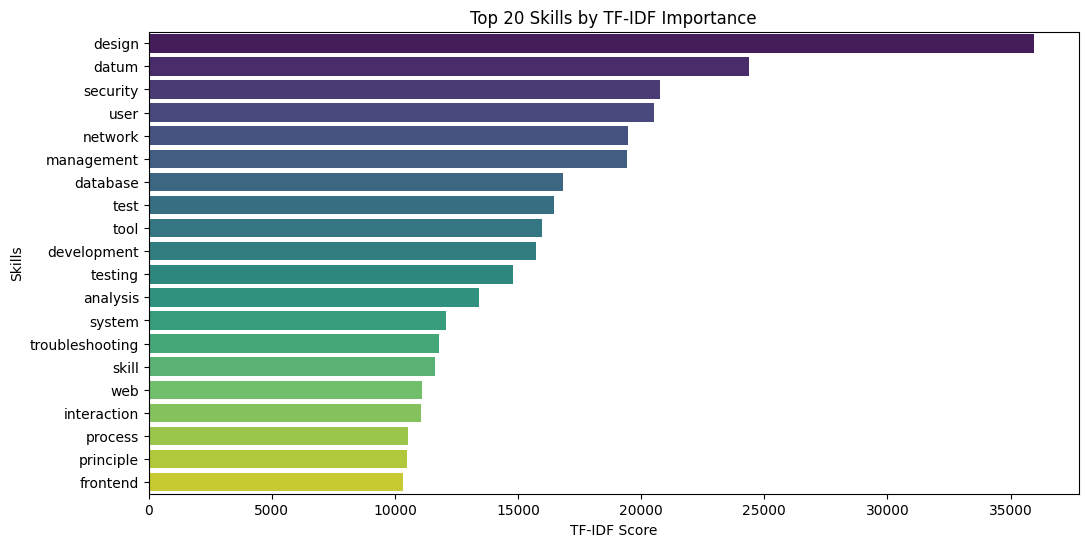

In [44]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette="viridis")
plt.title("Top 20 Skills by TF-IDF Importance")
plt.xlabel("TF-IDF Score")
plt.ylabel("Skills")
plt.show()

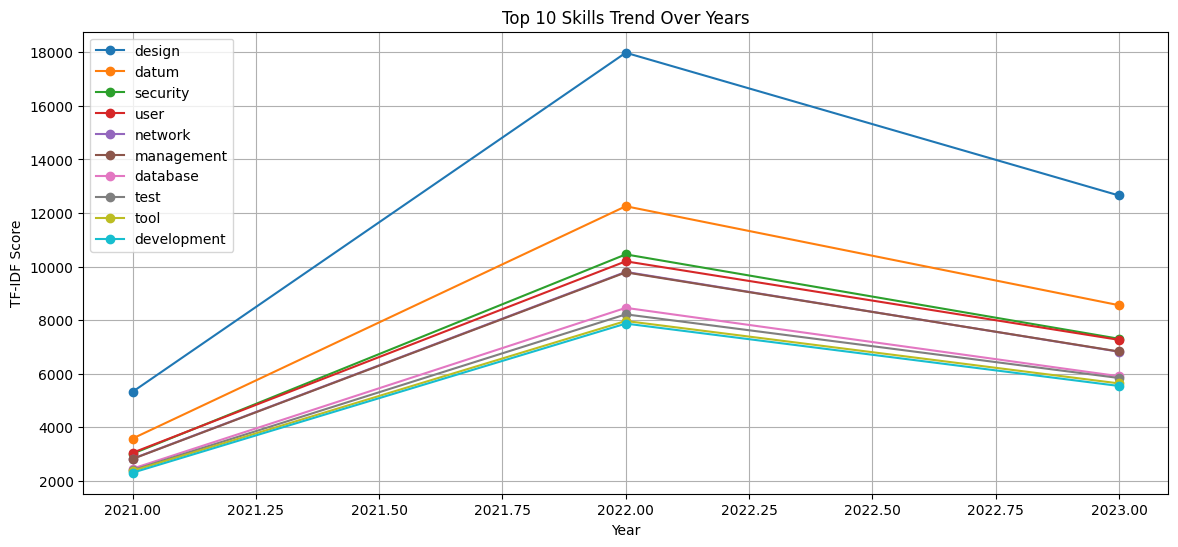

In [45]:
# Step 3: Skills Trend Analysis Over Time

# Add Year column to TF-IDF matrix
skills_tfidf['Year'] = df_it['Year'].values

# Group by Year and sum TF-IDF scores
skills_trend = skills_tfidf.groupby('Year').sum()

# focus on top 10 skills overall
top_10_skills = skill_importance.head(10).index
skills_trend_top = skills_trend[top_10_skills]

# Plot trends
plt.figure(figsize=(14,6))
for skill in top_10_skills:
    plt.plot(skills_trend_top.index, skills_trend_top[skill], marker='o', label=skill)

plt.title("Top 10 Skills Trend Over Years")
plt.xlabel("Year")
plt.ylabel("TF-IDF Score")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Calculate percentage change
skills_trend_pct = skills_trend.pct_change().fillna(0)

# Top growing skills for the latest year
top_growing = skills_trend_pct.loc[skills_trend_pct.index.max()].sort_values(ascending=False).head(10)
print(top_growing)

enforcement   -0.240333
journey       -0.252215
mapping       -0.252215
thinking      -0.256425
initiative    -0.258790
audit         -0.258790
metric        -0.258790
kpi           -0.258790
rich          -0.259259
individual    -0.259259
Name: 2023, dtype: float64


In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(skills_trend_top.T, cmap="YlGnBu", annot=True)
plt.title("Skills Trend Heatmap")
plt.xlabel("Year")
plt.ylabel("Skill")
plt.show()